In [1]:
import numpy as np
import math

n = 6 #dont make it 25
count = [0]
validcomb = []
equivcount = [0]

def equiv(combin1, combin2, length):
    return combin1[:length] == combin2[:length]

def valid(combination, n, validresult):
    k = math.floor(n)
    for i in range(1, k):
        if sum(combination[:i]) == n:
            for result in validcomb:
                if equiv(combination, result, i):
                    equivcount[0] += 1
                    return False
            return True
    return False

def numberpath(n, comb1):
    global count, validcomb 
    if len(comb1) == n:
        if valid(comb1, n, validcomb):
            print(comb1)
            count[0] += 1
            validcomb.append(list(comb1))
        return
    
    for block in [1, 2]:
        numberpath(n, comb1 + [block])


numberpath(n,[1])
print('All possible combinations:',2**(n-1))
print('Valid combinations:',count[0])
print('Equivalent combinations(the redundant steps):',equivcount)

p = count[0] / (2**(n-1) - int(equivcount[0]))

print(f'Probability of reaching {n} before {n-1} steps(considering the redundant steps) is {p}')

[1, 1, 1, 1, 2, 1]
[1, 1, 1, 2, 1, 1]
[1, 1, 2, 1, 1, 1]
[1, 1, 2, 2, 1, 1]
[1, 2, 1, 1, 1, 1]
[1, 2, 1, 2, 1, 1]
[1, 2, 2, 1, 1, 1]
All possible combinations: 32
Valid combinations: 7
Equivalent combinations(the redundant steps): [13]
Probability of reaching 6 before 5 steps(considering the redundant steps) is 0.3684210526315789


In [2]:
def comb(n,k):
    return math.comb(n,k)

def p_red(n):
    k = math.floor((n-1)/2)
    a = sum(comb(n-i-1, n-2*i-1) for i in range(1,k+1))
    redundant = sum(comb(n-i-1, n-2*i-1)* (2**i-1) for i in range(1,k+1))
    b = 2**(n-1)-redundant
    
    return a/b

def p(n):
    k = math.floor((n-1)/2)
    a = sum(comb(n-i-1, n-2*i-1) for i in range(1,k+1))
    redundant = sum(comb(n-i-1, n-2*i-1)* (2**i-1) for i in range(1,k+1))
    c = a+redundant
    b = 2**(n-1)
    
    return c/b

for n in range(3,28):
    p1 = p_red(n)
    p2 = p(n)
    print(f'For n={n}, the probability of considering redundant steps is {p1} and the not considering redundant steps is {p2}')

For n=3, the probability of considering redundant steps is 0.3333333333333333 and the not considering redundant steps is 0.5
For n=4, the probability of considering redundant steps is 0.3333333333333333 and the not considering redundant steps is 0.5
For n=5, the probability of considering redundant steps is 0.4 and the not considering redundant steps is 0.625
For n=6, the probability of considering redundant steps is 0.3684210526315789 and the not considering redundant steps is 0.625
For n=7, the probability of considering redundant steps is 0.35294117647058826 and the not considering redundant steps is 0.65625
For n=8, the probability of considering redundant steps is 0.3125 and the not considering redundant steps is 0.65625
For n=9, the probability of considering redundant steps is 0.2773109243697479 and the not considering redundant steps is 0.6640625
For n=10, the probability of considering redundant steps is 0.23893805309734514 and the not considering redundant steps is 0.6640625


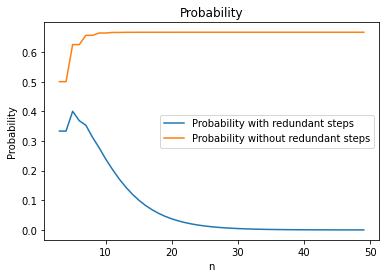

In [3]:
import matplotlib.pyplot as plt

def comb(n,k):
    return math.comb(n,k)

def p_red(n):
    k = math.floor((n-1)/2)
    a = sum(comb(n-i-1, n-2*i-1) for i in range(1,k+1))
    redundant = sum(comb(n-i-1, n-2*i-1)* (2**i-1) for i in range(1,k+1))
    b = 2**(n-1)-redundant
    
    return a/b

def p(n):
    k = math.floor((n-1)/2)
    a = sum(comb(n-i-1, n-2*i-1) for i in range(1,k+1))
    redundant = sum(comb(n-i-1, n-2*i-1)* (2**i-1) for i in range(1,k+1))
    c = a+redundant
    b = 2**(n-1)
    
    return c/b

for n in range(3,50):
    p1 = p_red(n)
    p2 = p(n)

x = list(range(3,50))
p_red = [p_red(n) for n in x]
p_nored = [p(n) for n in x]

plt.plot(x, p_red, label='Probability with redundant steps')
plt.plot(x, p_nored, label='Probability without redundant steps')
plt.xlabel('n')
plt.ylabel('Probability')
plt.title('Probability')
plt.legend()
plt.show()

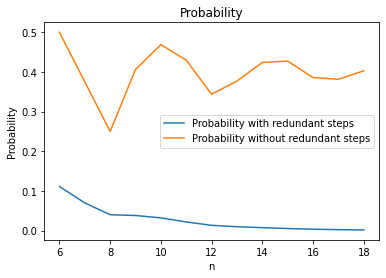

In [4]:
def equiv(combin1, combin2, length):
    return combin1[:length] == combin2[:length]

def valid(combination, n, validresult):
    k = math.floor(n)
    for i in range(1, k):
        if sum(combination[:i]) == n:
            for result in validcomb:
                if equiv(combination, result, i):
                    equivcount[0] += 1
                    return False
            return True
    return False

def numberpath(n, comb1):
    global count, validcomb 
    if len(comb1) == n:
        if valid(comb1, n, validcomb):
            count[0] += 1
            validcomb.append(list(comb1))
        return
    
    for block in [1, 4]:
        numberpath(n, comb1 + [block])
        

prob = []
prob1 = []
for n in range(6,19):
    count = [0]
    validcomb = []
    equivcount = [0]
    
    numberpath(n,[1])

    p = count[0] / (2**(n-1) - int(equivcount[0]))
    prob.append(p)
    
    p1 = (count[0]+int(equivcount[0])) / 2**(n-1)
    prob1.append(p1)
    
    
x = list(range(6,19))
plt.plot(x, prob, label='Probability with redundant steps')
plt.plot(x,prob1, label='Probability without redundant steps')
plt.xlabel('n')
plt.ylabel('Probability')
plt.title('Probability')
plt.legend()
plt.show()